<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%EB%AF%B8%EB%84%A4%EB%9E%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미네랄

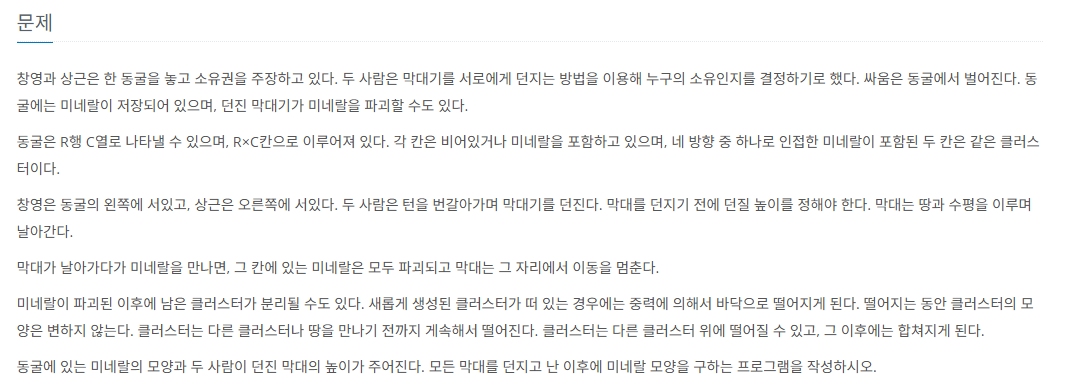

## 입력 출력 및 예제


* 입력

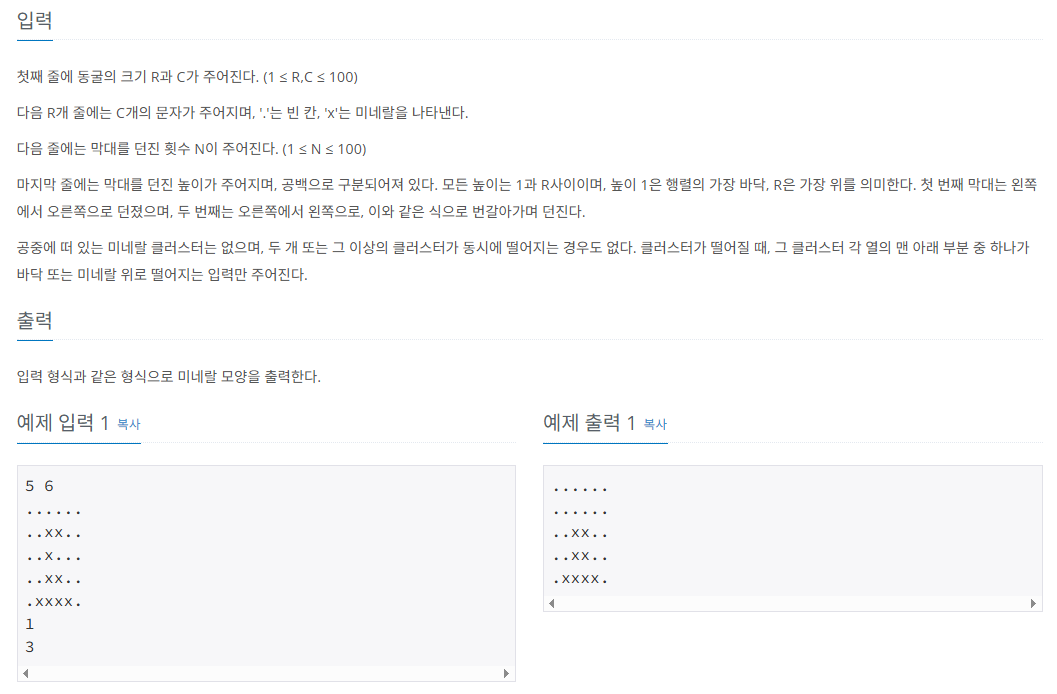

* 출력

* 예제

## 구상

- 1. 막대를 던져 해당 칸을 "."로 만들기
- 2. 변화에 따라 클러스터 전체 떨어뜨리기
    - 두 개 이상 클러스터가 떨어지는 경우는 없다
    - 그러므로 떨어질 수 있는 최소값(1칸 이상)을 구하고, 클러스터 전체를 최소값만큼 내리면 되지않을까? X
    - 클러스터에 속하지 않은 미네랄의 최소값...때문에 안됨
    - 그렇다면, 없어진 칸 위, 옆을 먼저 검사.
    - 클러스터를 만들고, 해당 클러스터 내에서 떨어질 수 있는 최소값을 구한 후 똑같이 해보자

- 다시 정리. 1. 막대로 해당 칸 "." 만들기 2. 해당 칸과 이어진 위or옆 미네랄을 통해 클러스터 만들기(*) 3. 클러스터 각 칸에서 떨어질 수 있는 최소값 구하기 4. 클러스터 전체를 해당 최소값 만큼 내리기. 반복.
- 여전히 3.에 문제가 있다.
    - 1) 같은 클러스터의 위치는 무시하면서(같이 움직이므로)
    - 2) (바닥 or 클러스터에 속하지않은 미네랄) 사이의 최소값 구하기.

- 다시 정리하면 1. 막대 던져서 맞는 곳 "." 만들고 해당 위치의 위, 반대편 좌표 반환, 2. 1의 좌표를 통해 클러스터링 후 좌표들 반환, 3. 각 미네랄 마다 아래로 떨어질 수 있는 여유 공간 거리 계산(같은 클러스터는 무시, 바닥or미네랄 닿을 때 까지). 4. 여유 공간 거리 중 최소값을 해당 클러스터의 모든 미네랄에 적용하여 내리기.

* 변화가 이루어질수 있는 유일한 부분이기 때문에


## 코드

In [19]:
# GPT
from collections import deque


R, C = map(int, input().split())
board = [list(input().strip()) for _ in range(R)]
N = int(input())
heights = list(map(int, input().split()))

dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def throw_stick(turn_idx, h):
    """turn_idx: 0-based, h: given height (from bottom). return (r, c) destroyed or None."""
    r = R - h
    if turn_idx % 2 == 0:  # left -> right
        for c in range(C):
            if board[r][c] == 'x':
                board[r][c] = '.'
                return (r, c)
    else:  # right -> left
        for c in range(C - 1, -1, -1):
            if board[r][c] == 'x':
                board[r][c] = '.'
                return (r, c)
    return None

def bfs_cluster(sr, sc, visited):
    """Return (cells_list, grounded)."""
    q = deque([(sr, sc)])
    visited[sr][sc] = True
    cells = [(sr, sc)]
    grounded = (sr == R - 1)

    while q:
        x, y = q.popleft()
        for dx, dy in dirs:
            nx, ny = x + dx, y + dy
            if 0 <= nx < R and 0 <= ny < C and not visited[nx][ny] and board[nx][ny] == 'x':
                visited[nx][ny] = True
                q.append((nx, ny))
                cells.append((nx, ny))
                if nx == R - 1:
                    grounded = True
    return cells, grounded

def drop_cluster(cells):
    """cells: list of (r,c) for floating cluster"""
    # 1) remove cluster temporarily
    in_cluster = set(cells)
    for x, y in cells:
        board[x][y] = '.'

    # 2) for each column, find bottom-most cell of this cluster
    bottom_in_col = dict()  # c -> max r
    for x, y in cells:
        if y not in bottom_in_col or x > bottom_in_col[y]:
            bottom_in_col[y] = x

    # 3) compute minimum drop distance
    drop = R  # big
    for c, br in bottom_in_col.items():
        d = 0
        nr = br + 1
        while nr < R and board[nr][c] == '.':
            d += 1
            nr += 1
        drop = min(drop, d)

    # 4) place cluster dropped
    for x, y in cells:
        board[x + drop][y] = 'x'

for i, h in enumerate(heights):
    destroyed = throw_stick(i, h)
    if destroyed is None:
        continue

    dr, dc = destroyed
    visited = [[False] * C for _ in range(R)]

    floating = None

    # only neighbors can be affected
    for dx, dy in dirs:
        nr, nc = dr + dx, dc + dy
        if 0 <= nr < R and 0 <= nc < C and board[nr][nc] == 'x' and not visited[nr][nc]:
            cells, grounded = bfs_cluster(nr, nc, visited)
            if not grounded:
                floating = cells
                break  # at most one floating cluster

    if floating:
        drop_cluster(floating)

for row in board:
    print(''.join(row))


5 6
......
..xx..
..x...
..xx..
.xxxx.
1
3
......
......
..xx..
..xx..
.xxxx.


In [10]:
R, C = map(int, input().split())
graph = []
for _ in range(R):
    graph.append(list(input()))

N = int(input())
H = list(map(int, input().split()))
print(graph)
print(H)

1 4
xxxx
2
1 1
[['x', 'x', 'x', 'x']]
[1, 1]


In [12]:
def throw(h, c, graph): # h : 높이, c : 순서(에 의해 방향 결정), graph
    H = len(graph)
    W = len(graph[0])
    for i in range(W):
        if c % 2 == 1: # 좌 -> 우
            if graph[-h][i] == 'x':
                graph[-h][i] = '.'
                # 없어진 곳 기준 위, 없다면 오른쪽 반환
                if (h+1) <= H and graph[-(h+1)][i] == 'x':
                    return (-(h+1), i)
                elif i+1 <= W-1 and graph[-h][i+1] == 'x':
                    return (-h, i+1)
                else:
                    return -1

        if c % 2 == 0: # 우 -> 좌
            if graph[-h][W - i - 1] == 'x':
                graph[-h][W - i - 1] = '.'
                # 없어진 곳 기준 위, 없다면 왼쪽 반환
                if (h+1) <= H and graph[-(h+1)][W - i - 1] == 'x':
                    return (-(h+1), W - i - 1)
                elif W - i - 2 >= 0 and graph[-h][W - i - 2] == 'x':
                    return (-h, W - i - 2)
                else:
                    return -1
    return -1

In [ ]:
def cluster(sr, sc)

In [ ]:
def dfs(x,y,g):
    dirs = [(-1,0), (1,0), (0,-1), (0,1)]


### 메모
- 구상과 흐름은 큰 문제가 없다. 다만 구현 실력, 클린 코딩이 부족하다. gpt에게 도움을 받으며 이 부분을 고쳐나가보자


*